In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("ToyotaCorolla - MLR.csv")

In [3]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


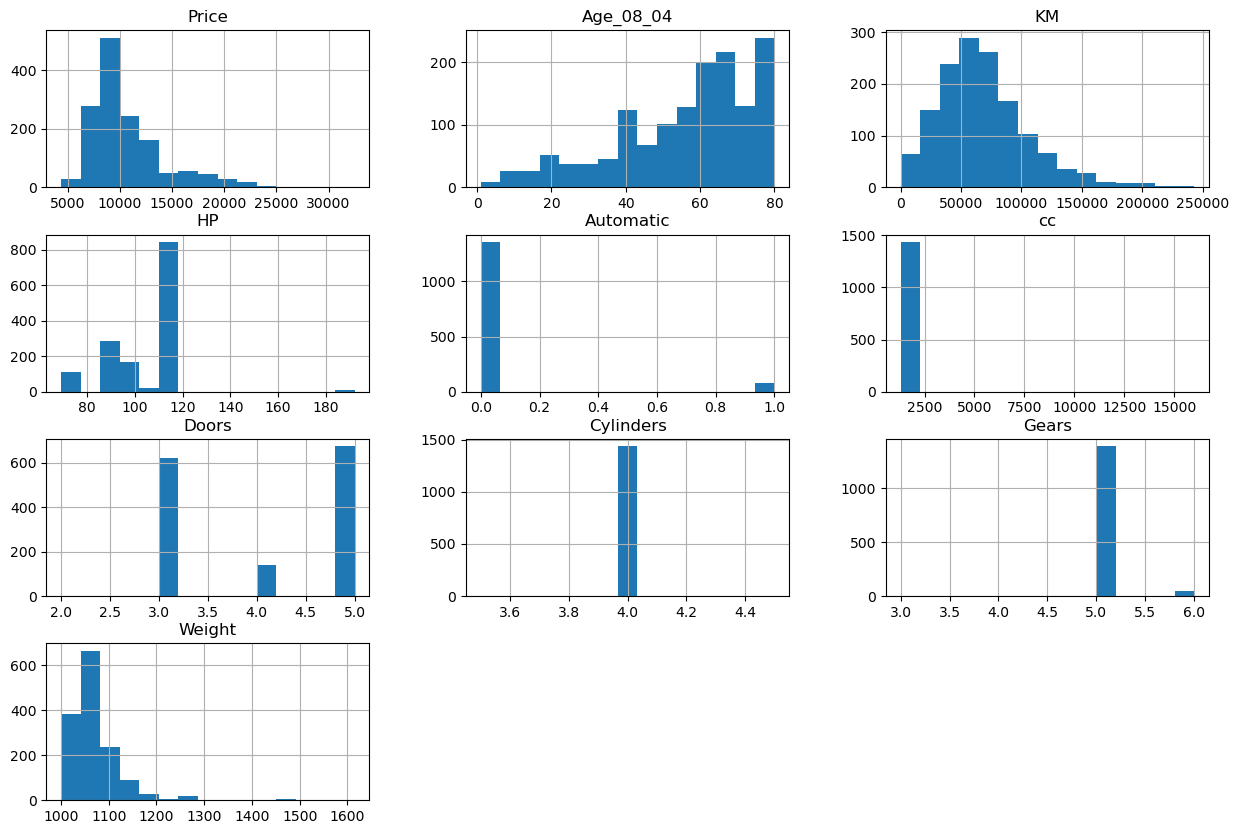

In [5]:
data.hist(bins=15,figsize=(15,10))
plt.show()

<Axes: >

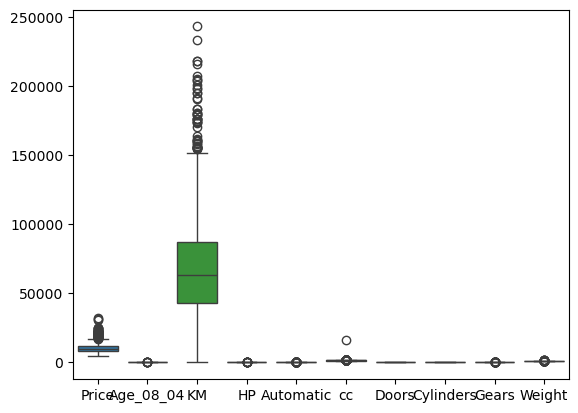

In [6]:
sns.boxplot(data)

In [7]:
km_median=data["KM"].median()
km_median

63389.5

### Detecting outliers

In [9]:
q1=data['KM'].quantile(.25)
q3=data['KM'].quantile(.75)
IQR=q1-q3

df=pd.DataFrame(data)

lower_bound=q1-1.5*IQR
upper_bound=q3-1.5*IQR

data[(data['KM'] < lower_bound) | (data['KM'] > upper_bound)]


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [63]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [67]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [61]:
df=data.drop("Fuel_Type",axis=1,inplace=True)
df

KeyError: "['Fuel_Type'] not found in axis"

In [11]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Check Assumption

In [21]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

# Define X and y
X = data.drop('Price', axis=1)  # Features
y = data['Price']                # Target variable (corrected)

# Scale the features
X_scaled = scaler.fit_transform(X)

### splitting data into train and test 

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### model Building

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
model1=LinearRegression()
model1.fit(x_train,y_train)

y_pred=model1.predict(x_test)
print(f'Model 1 - MSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}')

Model 1 - MSE: 1970126.628813033, R^2: 0.8523452141908852


In [34]:
## r_Squared value  is 0.85 it means r squared is good for my  model

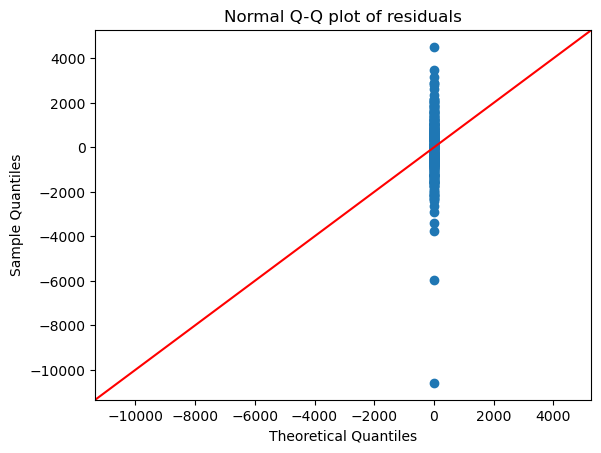

In [42]:
import statsmodels.api as sm


# Calculate residuals
residuals = y_test - y_pred

# Q-Q plot of residuals
qqplot = sm.qqplot(residuals, line='45')  # '45' line represents the diagonal
plt.title("Normal Q-Q plot of residuals")
plt.show()

# points are highly away from best fit line

In [38]:
from sklearn.linear_model import Lasso, Ridge

# Lasso
lasso = Lasso(alpha=0.1)# regularization strength
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Ridge
ridge = Ridge(alpha=1.0) # regularization strength
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

# Evaluation of Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso - MSE: {mse_lasso}, R^2: {r2_lasso}')

# Evaluation of Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge - MSE: {mse_ridge}, R^2: {r2_ridge}')


Lasso - MSE: 1970083.2317954684, R^2: 0.8523484666606703
Ridge - MSE: 1970296.9643044977, R^2: 0.8523324480822807


In [ ]:
## and the lasso is 0.85
## ad well as the ridge is 0.85

## 1.What is Normalization & Standardization and how is it helpful?

#### data normalization and standerdization both are common technique which is usen in the data preprocessing as well as used to scaled or transform data which can improve the conversion and speed of model
#### normalization : is use to convert 0 or 1 ,-1 to 1 when we need to scaled feature in a specific range

#### standerdization : we used it when the feature allow the goussian distribution also used when the features having a different unit

# 2.What techniques can be used to address multicollinearity in multiple linear regression?


#### Multicollinearity occurs in multiple linear regression when two or more predictor variables are highly correlated with each other. This leads to redundancy in the information provided by the predictors, causing issues in the model, such as inflated standard errors and unstable coefficient estimates.